# Logistic Regression

### One of the most amazing things about Python’s scikit-learn library is that is has a 4-step modeling pattern that makes it easy to code a machine learning classifier. 

#### While we are discussing a classifier called Logistic Regression, the coding process here applies to other classifiers in sklearn like Decision Tree, K-Nearest Neighbors etc.

#### In this tutorial, we use Logistic Regression to predict digit labels based on images. 

<img src='../mnist2.JPG'>

#### The image above shows a bunch of training digits (observations) from the MNIST dataset whose category membership is known (labels 0–9). 

#### After training a model with logistic regression, it can be used to predict an image label (labels 0–9) given an image.

# Logistic Regression on Digits Dataset

### Loading the Data (Digits Dataset)

* The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. 

* The code below will load the digits dataset.


In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### There are 1797 images and 1797 labels in the dataset

### Showing the Images and the Labels (Digits Dataset)

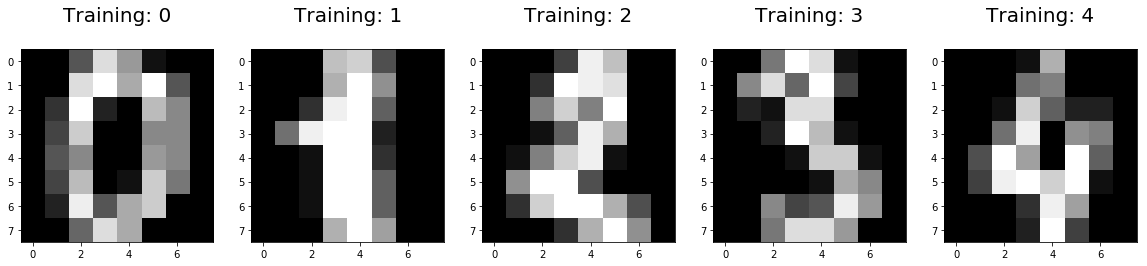

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## Splitting Data into Training and Test Sets (Digits Dataset)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)
### Step 1. Import the model you want to use
### In sklearn, all machine learning models are implemented as Python classes

In [8]:
from sklearn.linear_model import LogisticRegression

### Step 2. Make an instance of the Model

In [9]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

### Step 3. Training the model on the data, storing the information learned from the data
### Model is learning the relationship between digits (x_train) and labels (y_train)

In [10]:
logisticRegr.fit(x_train, y_train)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 4. Predict labels for new data (new images)
### Uses the information the model learned during the model training process

In [11]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

### Predict for Multiple Observations (images) at Once

In [12]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Make predictions on entire test data

In [13]:
predictions = logisticRegr.predict(x_test)

### Measuring Model Performance (Digits Dataset)

### While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric. 

### We are going to see how the model performs on the new data (test set)

### Accuracy is defined as:
#### (fraction of correct predictions): correct predictions / total number of data points

In [14]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


## Confusion Matrix (Digits Dataset)
### A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

### In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

The confusion matrix below is not visually super informative or visually appealing.

In [16]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


### Using Seaborn
#### This method produces a more understandable and visually readable confusion matrix using seaborn.


Text(0.5, 1.0, 'Accuracy Score: 0.9533333333333334')

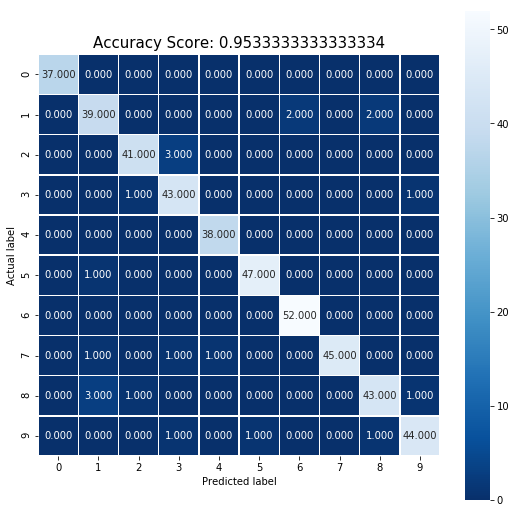

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)